In [2]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


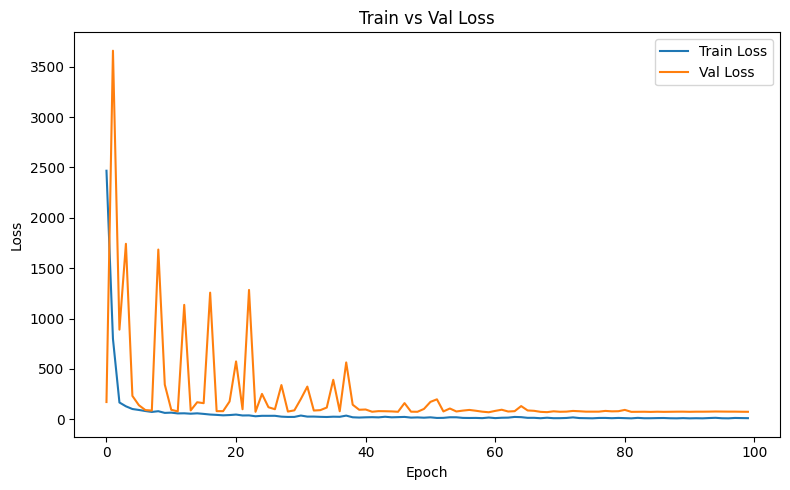

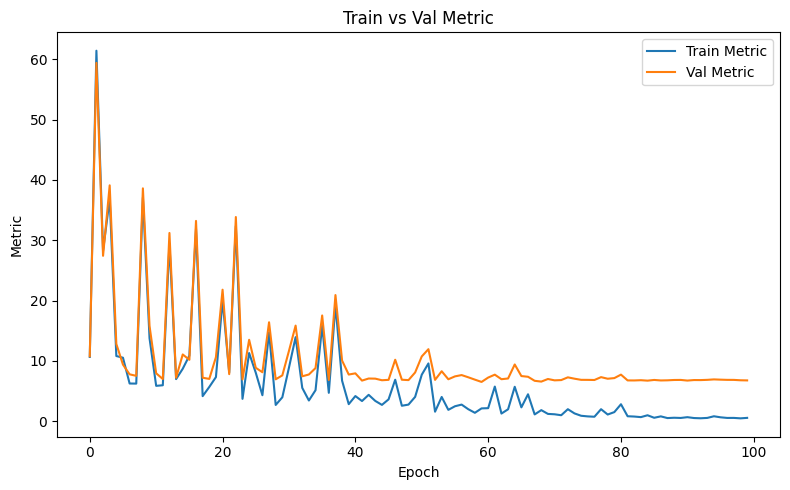

In [6]:
def plot_training_curves(csv_path: str):
    """
    从 CSV 自动识别并绘制：
      - 如果有 train_loss & val_loss，则画训练/验证损失曲线
      - 否则如果只有 loss，则画单一 loss 曲线
      - 如果有 train_metric & val_metric，则画训练/验证指标曲线
    """
    df = pd.read_csv(csv_path)
    
    # 找 epoch 列
    if 'epoch' in df.columns:
        x = df['epoch']
    else:
        x = df.index + 1
    
    # 画 Loss 曲线
    plt.figure(figsize=(8,5))
    if {'train_loss','val_loss'}.issubset(df.columns):
        sns.lineplot(x=x, y=df['train_loss'], label='Train Loss')
        sns.lineplot(x=x, y=df['val_loss'],   label='Val Loss')
        plt.title('Train vs Val Loss')
    elif 'loss' in df.columns:
        sns.lineplot(x=x, y=df['loss'], label='Loss')
        plt.title('Loss Curve')
    else:
        print("⚠️ 未找到任何 loss 列（train_loss/val_loss 或 loss）")
        return
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 画 Metric 曲线
    if {'train_metric','val_metric'}.issubset(df.columns):
        plt.figure(figsize=(8,5))
        sns.lineplot(x=x, y=df['train_metric'], label='Train Metric')
        sns.lineplot(x=x, y=df['val_metric'],   label='Val Metric')
        plt.title('Train vs Val Metric')
        plt.xlabel('Epoch')
        plt.ylabel('Metric')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("ℹ️ 未找到 train_metric/val_metric，可跳过指标曲线")

# 用法示例
csv_path = '/work/zichen0725/simclr/experiments_results_20250601_200134/age_training_log.csv'
plot_training_curves(csv_path)